In [6]:
import json
import jsmin
from lussac.core import LussacData
import pathlib
import platform
import spikeinterface.core as si
import numpy as np
import matplotlib.pyplot as plt
from python_code.nord_cmap import *
from tqdm import tqdm
from typing import Callable, Iterable   
import pandas as pd
import pickle
import networkx as nx

ModuleNotFoundError: No module named 'lussac'

In [3]:
def load_json(filename: str) -> dict:
	"""
	Loads the JSON parameters file and returns its content.

	@param filename: str
		Path to the file containing Lussac's parameters.
	@return params: dict
		Lussac's parameters.
	"""
	folder = pathlib.Path(filename).parent
	with open(filename) as json_file:
		minified = jsmin.jsmin(json_file.read())  # Parses out comments.
		minified = minified.replace("$PARAMS_FOLDER", str(folder.absolute()))
		print(folder.absolute())
		if platform.system() == "Windows":  # pragma: no cover (OS specific).
			minified = minified.replace("\\", "\\\\")

		return json.loads(minified)

In [5]:
params = load_json('/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/lussac_params.json')
data = LussacData.create_from_params(params)    


NameError: name 'pathlib' is not defined

In [2]:
analyses_metrics = pd.read_pickle("data_nodes.pkl")

In [11]:
def estimate_cross_contamination(spike_train1: np.ndarray, spike_train2: np.ndarray,
								 refractory_period: tuple[float, float]) -> float:
	"""
	Estimates the cross-contamination of the second spike train with the neuron of the first spike train.
	Also performs a statistical test to check if the cross-contamination is significantly higher than a given limit.

	@param spike_train1: np.ndarray
		The spike train of the first unit.
	@param spike_train2: np.ndarray
		The spike train of the second unit.
	@param refractory_period: tuple[float, float]
		The censored and refractory period (t_c, t_r) used (in ms).
	@param limit: float
		The higher limit of cross-contamination for the statistical test.
	@return (estimated_cross_cont, p_value): tuple[float, float]
		Returns the estimation of cross-contamination, as well as the p-value of the statistical test.
	"""
	spike_train1 = spike_train1.astype(np.int64)
	spike_train2 = spike_train2.astype(np.int64)

	N1 = len(spike_train1)
	N2 = len(spike_train2)
	C1 = estimate_contamination(spike_train1, refractory_period)

	return C1


In [ ]:
refraction_period = [0.2, 1.0]

In [2]:
path = "/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/lussac_graph/logs/merge_sortings/all"
graph = pickle.load(open(path + "/final_graph.pkl", 'rb'))

best_match = pickle.load(open("/media/andrea/Crucial X6/synthetic_MEArec/best_match.pickle", 'rb'))

In [8]:
analyses_metrics

num_spikes  firing_rate  presence_ratio        snr  isi_violations_ratio  \
0       15687.0     4.357500             1.0   2.805877              0.000000   
1       38137.0    10.593611             1.0  11.535462              0.000000   
2       14908.0     4.141111             1.0  11.112219              0.005399   
3       22085.0     6.134722             1.0  11.877765              0.000000   
4       26491.0     7.358611             1.0   3.491609              0.006840   
..          ...          ...             ...        ...                   ...   
241     17001.0     4.722500             1.0   4.813608              0.000000   
242     22419.0     6.227500             1.0   3.954758              0.000000   
243     58043.0    16.123056             1.0   4.507840              0.000000   
244      9906.0     2.751667             1.0   4.221182              0.000000   
245     29869.0     8.296944             1.0   4.656227              0.000000   

     isi_violations_count  rp_contamination  rp_violations  \
0                     0.0          0.000000            0.0   
1                     0.0          0.000000            0.0   
2                     1.0          0.008132            1.0   
3                     0.0          0.000000            0.0   
4                     4.0          0.010313            4.0   
..                    ...               ...            ...   
241                   0.0          0.000000            0.0   
242                   0.0          0.000000            0.0   
243                   0.0          0.000000            0.0   
244                   0.0          0.000000            0.0   
245                   0.0          0.000000            0.0   

     sliding_rp_violation  amplitude_cutoff  amplitude_median  sync_spike_2  \
0                   0.010               NaN              17.5      0.065596   
1                   0.005               NaN              70.0      0.071532   
2                   0.020               NaN              66.0      0.072847   
3                   0.005               NaN             103.0      0.074394   
4                   0.015               NaN              31.0      0.066362   
..                    ...               ...               ...           ...   
241                 0.010               NaN              42.0      0.026998   
242                 0.010               NaN              35.0      0.028101   
243                 0.005               NaN              39.5      0.027325   
244                 0.025               NaN              36.0      0.032405   
245                 0.005               NaN               7.5      0.028257   

     sync_spike_4  sync_spike_8  
0        0.000000           0.0  
1        0.000026           0.0  
2        0.000134           0.0  
3        0.000136           0.0  
4        0.000075           0.0  
..            ...           ...  
241      0.000000           0.0  
242      0.000000           0.0  
243      0.000000           0.0  
244      0.000000           0.0  
245      0.000000           0.0  

[3569 rows x 14 columns]

# I. Clustering for every clusters

## I.1 Non supervised

In [1]:
from sklearn.cluster import AffinityPropagation, HDBSCAN

In [2]:
def clustering_data(data, clustering_method = 'AffinityPropagation', *kwargs) : 
    
    methods = [AffinityPropagation(), Birch(), HDBSCAN(min_cluster_size=3, max_cluster_size = 10, store_centers= 'both')]
    methods_str = ['AffinityPropagation', 'Birch', 'HDBSCAN']       
    
    
    if clustering_method not in methods_str : raise Exception('Unknown clustering methods, availaible one : ' + str(methods_str))
    

    method = methods[methods_str.index(clustering_method)]
    print(method)
    method.fit(data)
    print(method.labels_.max())
    
    
    return method

In [ ]:
def clustering_nodes(data )

## I.2 Supervised

In [8]:
import json
import jsmin
# from lussac.core import LussacData
import pathlib
import platform
import spikeinterface.core as si
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from typing import Callable, Iterable
import pickle
from python_code.nord_cmap import *
# plt.style.use('rose-pine-moon')

In [9]:
graph = pickle.load(open("final_graph_2.pickle", 'rb'))

In [10]:
graph_labeled = pickle.load(open("/media/andrea/Crucial X6/final_graph_labeled.pkl", 'rb'))

In [11]:
best_match = pickle.load(open("/media/andrea/Crucial X6/synthetic_MEArec/best_match.pickle", 'rb'))

In [12]:
matched_nodes = np.load("matched_nodes.npy")

In [13]:
def neighboors(arr) : 
        
        ng = [np.arange(len(arr))[arr == arr[k]] for k in range(len(arr))]
        
        return ng

ng_true = neighboors(matched_nodes[:,2])

In [14]:
def clusters_metrics(clusters) : 
    clusters_m = []
    cluster_sd_ratio = []
    for i,cluster in enumerate(clusters) : 
        acc_list = []
        sd = []
        for j,node in enumerate(cluster) : 
            
            nd = (matched_nodes[node][1], int(matched_nodes[node][0]))
            acc = graph_labeled.nodes[nd]['gt_accuracy']
            acc_list.append(acc)
                
            sd.append(graph_labeled.nodes[nd]['sd_ratio'])
        clusters_m.append(acc_list)
        cluster_sd_ratio.append(sd)
    
    return clusters_m, cluster_sd_ratio
        
        

In [15]:
clusters_m, cluster_sd = clusters_metrics(np.array(ng_true, dtype = object))

In [17]:
import pandas as pd
analyses_metrics = pd.read_pickle("/media/andrea/Crucial X6/scholar/Master/IMEX/codes/data_nodes.pkl")

In [18]:
def weighting_function(node,max) : 
    
    if node == max : 
        return 1
    else : 
        weights = (np.tanh(-(node - max / 4))/2 + 1/2)**2
        weights = weights / (np.tanh(-(0 - max / 4))/2 + 1/2)**2
        return weights

In [19]:
analyses_metrics['score_aur'] = analyses_metrics['firing_rate'] * (1 - 2 * analyses_metrics['rp_contamination']) 

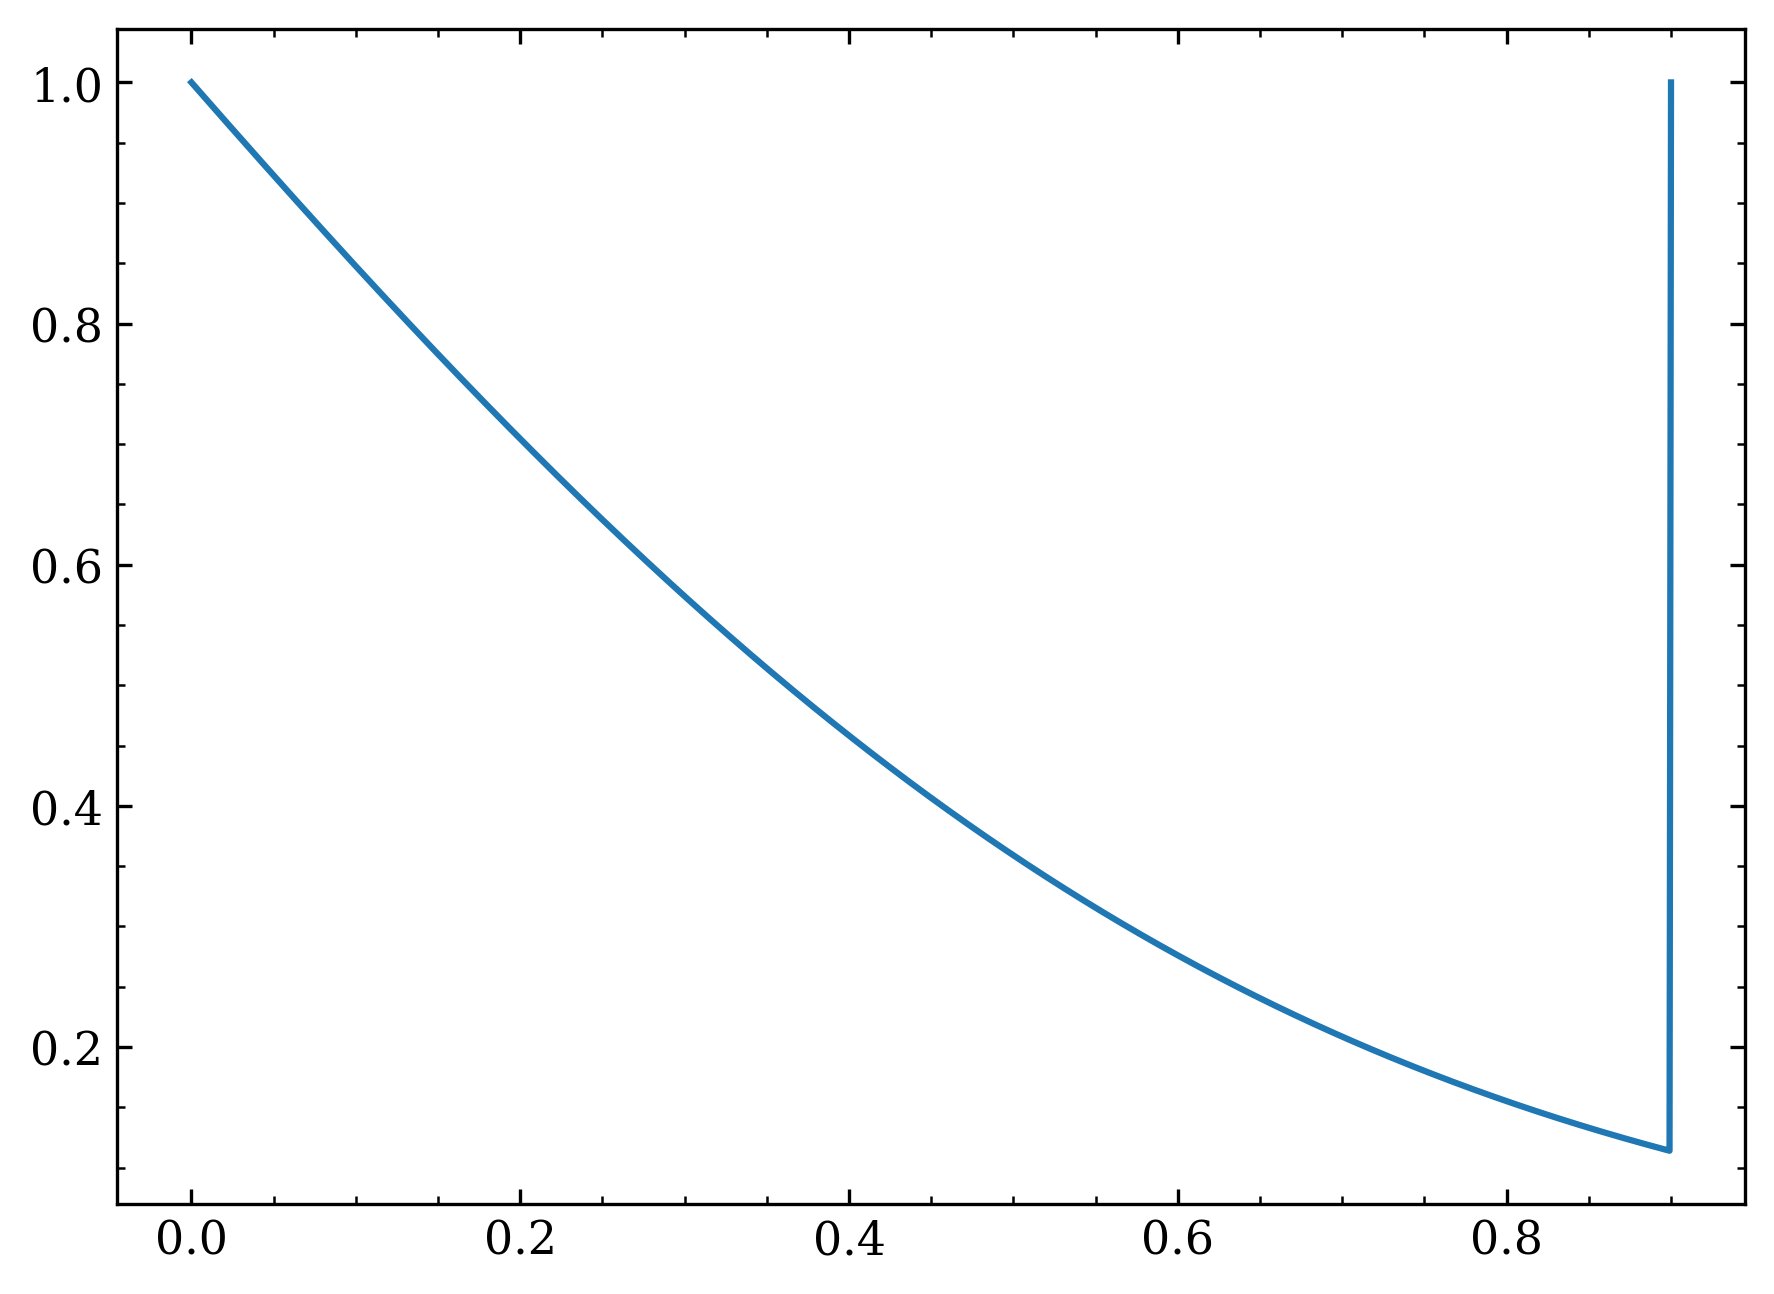

In [20]:
x = np.linspace(0,.9,1000)
y = [weighting_function(i,.9) for i in x]
plt.plot(x,y)

In [21]:
y_cluster = []
y_weights = []
X_cluster = []

for i, cluster in enumerate(clusters_m) : 
   if np.max(cluster) <= .2: # relative to accuracy
      
      y_cluster.append([0 for node in cluster])
      y_weights.append([1 for node in cluster])
      data_cluster = np.array(analyses_metrics.iloc[ng_true[i]][['rp_contamination', 'snr', 'sync_spike_2', 'sync_spike_4','firing_rate', 'score_aur']])
      data_cluster = np.insert(data_cluster, 6, cluster_sd[i], axis = 1)
      if 0 in np.std(data_cluster, axis = 0) : 
         X_cluster.append(data_cluster)
      else : X_cluster.append((data_cluster - data_cluster.mean(axis = 0)) / data_cluster.std(axis = 0))
   else : 
      y_cluster.append([0 if node != np.max(cluster) else 1 for node in cluster])
      y_weights.append([weighting_function(node, np.max(cluster))  for node in cluster])
      data_cluster = np.array(analyses_metrics.iloc[ng_true[i]][['rp_contamination', 'snr', 'sync_spike_2', 'sync_spike_4','firing_rate', 'score_aur']])
      data_cluster = np.insert(data_cluster, 6, cluster_sd[i], axis = 1)
      if 0 in np.std(data_cluster, axis = 0) : 
         X_cluster.append(data_cluster)
      else : 
         data_cluster = (data_cluster - data_cluster.mean(axis = 0)) / data_cluster.std(axis = 0)
         X_cluster.append(data_cluster)
         

In [22]:
y_cluster = np.array(y_cluster, dtype = object)

In [23]:
mask = np.concatenate(y_cluster) == 1
true_weights = np.empty_like(np.concatenate(y_weights))
true_weights[mask] = np.concatenate(y_weights)[mask]  * 5.11548191
true_weights[~mask] = np.concatenate(y_weights)[~mask] * 0.55416552

In [24]:
import seaborn as sns
df = pd.DataFrame(np.concatenate(X_cluster), columns = ['rp_contamination', 'snr', 'sync_spike_2', 'sync_spike_4','firing_rate', 'score_aur', 'sd_ratio'])


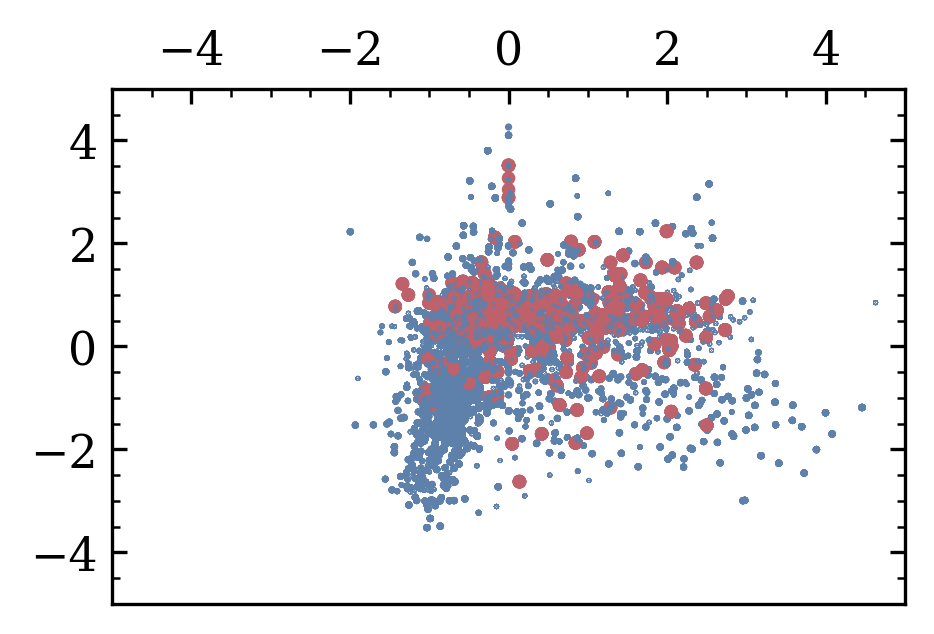

In [25]:
fig, ax = plt.subplots(figsize = (3,2))
X = np.random.uniform((-1,0),(1,20),(10000,2))

scat = ax.scatter(np.concatenate(X_cluster)[:,3], np.concatenate(X_cluster)[:,5],s = true_weights , c = np.concatenate(y_cluster), cmap = cmap1)

ax.xaxis.tick_top()
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.xaxis.set_label_position('top') 
# plt.savefig("/media/andrea/Crucial X6/Master/IMEX/CR/figure/clusters_weights.png", dpi = 300, bbox_inches='tight')

In [26]:
from sklearn.gaussian_process.kernels import RBF


In [27]:
from sklearn.svm import SVC

In [218]:
clf2 = SVC(gamma = .01,class_weight = 'balanced', C = 25)
clf2.fit(np.concatenate(X_cluster)[:,[0,5]], np.concatenate(y_cluster), sample_weight = np.concatenate(y_weights))


SVC(C=25, class_weight='balanced', gamma=0.01)

(-5.0, 5.0)

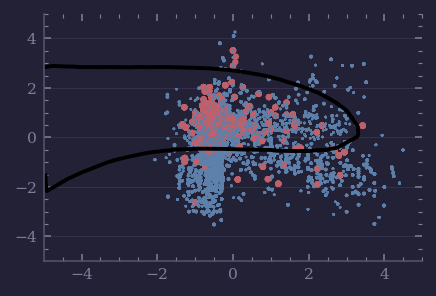

In [219]:
fig,ax = plt.subplots(figsize = (3,2))
X = np.random.uniform((-5, -5,-5, -5, -5, -5, -5),(5,5, 5,5, 5, 5, 5),(1000,7))
scat = ax.scatter(np.concatenate(X_cluster)[:,0], np.concatenate(X_cluster)[:,5],s = true_weights , c = np.concatenate(y_cluster), cmap = cmap1)
surf = ax.tricontour(*X.T[[0,5]], clf2.decision_function(X[:,[0,5]]), levels = [0],colors = 'k', linewidths = 2)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10, leaf_size=20)
neigh.fit(np.concatenate(X_cluster)[:,[0,5]], np.concatenate(y_cluster))

KNeighborsClassifier(leaf_size=20, n_neighbors=10)

In [18]:
x,y = np.mgrid[-5:5:.01, -5:5:.01]
Z = neigh.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)



KeyboardInterrupt: 

(-5.0, 5.0)

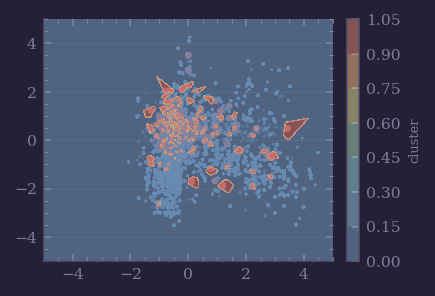

In [144]:
fig,ax = plt.subplots(figsize = (3,2))
scat = ax.scatter(np.concatenate(X_cluster)[:,0], np.concatenate(X_cluster)[:,5],s = true_weights , c = np.concatenate(y_cluster), cmap = cmap1)
surf = ax.contourf(x,y,Z, cmap = cmap1, alpha = .6)
plt.colorbar(surf, ax = ax, label = 'cluster')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

In [30]:
from sklearn.gaussian_process.kernels import RBF

In [31]:
x,y = np.mgrid[-5:5:.05, -5:5:.05]
Z = gauss.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)

NameError: name 'gauss' is not defined

(-5.0, 5.0)

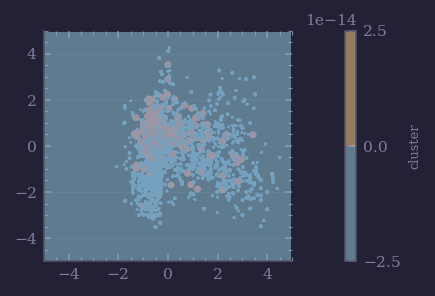

In [24]:
fig,ax = plt.subplots(figsize = (3,2))
scat = ax.scatter(np.concatenate(X_cluster)[:,0], np.concatenate(X_cluster)[:,5],s = true_weights , c = np.concatenate(y_cluster), cmap = cmap1)
surf = ax.contourf(x,y,Z, cmap = cmap1, alpha = .6)
plt.colorbar(surf, ax = ax, label = 'cluster')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

In [42]:
np.sum(np.concatenate(y_cluster)) / len(np.concatenate(y_cluster))

0.09724797863659966

In [78]:
plt.style.use('default')

In [33]:
np.concatenate(X_cluster)[:, [0,5]].shape

(40443, 2)

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(priors=[1/11.28, 10.28/11.28])
qda.fit(np.concatenate(X_cluster), np.concatenate(y_cluster))

QuadraticDiscriminantAnalysis(priors=[0.08865248226950355, 0.9113475177304965])

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [41]:
X_train, X_test, y_train, y_test = train_test_split(np.concatenate(X_cluster), np.concatenate(y_cluster), test_size=0.2, random_state=42)

In [46]:
RFG = RandomForestClassifier(n_estimators = 200, max_depth = 10, class_weight = 'balanced')

RFG.fit(X_train, y_train)
RFG.score(np.concatenate(X_cluster), np.concatenate(y_cluster), sample_weight = true_weights)

0.9776213415425205

In [ ]:
GBC = GradientBoostingClassifier(n_estimators = 200, max_depth = 10,)
GBC.fit(X_train, y_train)
GBC.score(np.concatenate(X_cluster), np.concatenate(y_cluster), sample_weight = true_weights)

In [55]:
from sklearn.ensemble import StackingClassifier
gnb = GaussianNB()
qda = QuadraticDiscriminantAnalysis(priors=[1/11.28, 10.28/11.28])
estimators = [('rf', RFG), ('gbc', GBC), ('qda', qda), ('gnb', gnb)]
clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=200, max_depth = 10))

In [56]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       n_estimators=200)),
                               ('gbc',
                                GradientBoostingClassifier(max_depth=10,
                                                           n_estimators=200)),
                               ('qda',
                                QuadraticDiscriminantAnalysis(priors=[0.08865248226950355,
                                                                      0.9113475177304965])),
                               ('gnb', GaussianNB())],
                   final_estimator=RandomForestClassifier(max_depth=10,
                                                          n_estimators=200))

In [57]:
clf.score(np.concatenate(X_cluster), np.concatenate(y_cluster), sample_weight = true_weights)

0.9998863877821389

In [66]:
centroid = np.mean(np.concatenate(X_cluster)[np.concatenate(y_cluster) == 1], axis = 0)

In [83]:
def reshape_ypred(X, y) : 
    ypred = []
    for j in range(len(X)) : 
        index = int(np.sum([len(X[i]) for i in range(j)]))
        ypred.append([y[index + i] for i in range(len(X[j]))])
    return ypred

In [84]:
ypred = reshape_ypred(ng_true, clf.predict(np.concatenate(X_cluster)))

In [87]:
centroid = np.mean(np.concatenate(X_cluster)[np.concatenate(y_cluster) == 1], axis = 0)

In [134]:
def centroid_distance(X_cluster, y_cluster, centroid) : 
    dist = []
    for i, cluster in enumerate(X_cluster) : 
        if 1 in y_cluster[i]:
            mask = np.array(y_cluster[i]) == 1
            cluster[~mask] = 1e3 # sufficiently high value to get rid of it
            dist.append(np.argmin(np.linalg.norm(cluster - centroid, axis = 1), axis = 0))
        else : 
            dist.append(0)
    return dist



In [136]:
dist = centroid_distance(X_cluster,y_cluster, centroid)

In [ ]:
x,y = np.mgrid[-5:5:0.02, -5:5:.02]
Z = qda.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)

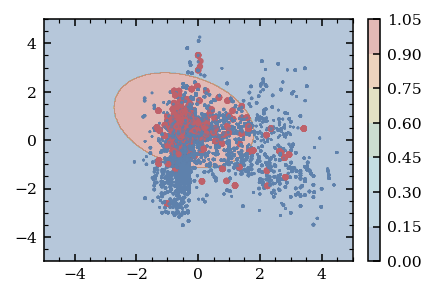

In [21]:
fig,ax = plt.subplots(figsize = (3,2))
surf = ax.contourf(x,y,Z, cmap = cmap1, alpha = .5)
scat = ax.scatter(np.concatenate(X_cluster)[:,0], np.concatenate(X_cluster)[:,5],s = true_weights , c = np.concatenate(y_cluster), cmap = cmap1)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
plt.colorbar(surf)
plt.savefig("../CR/figure/cluster_qda2.png", dpi = 300)

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprec

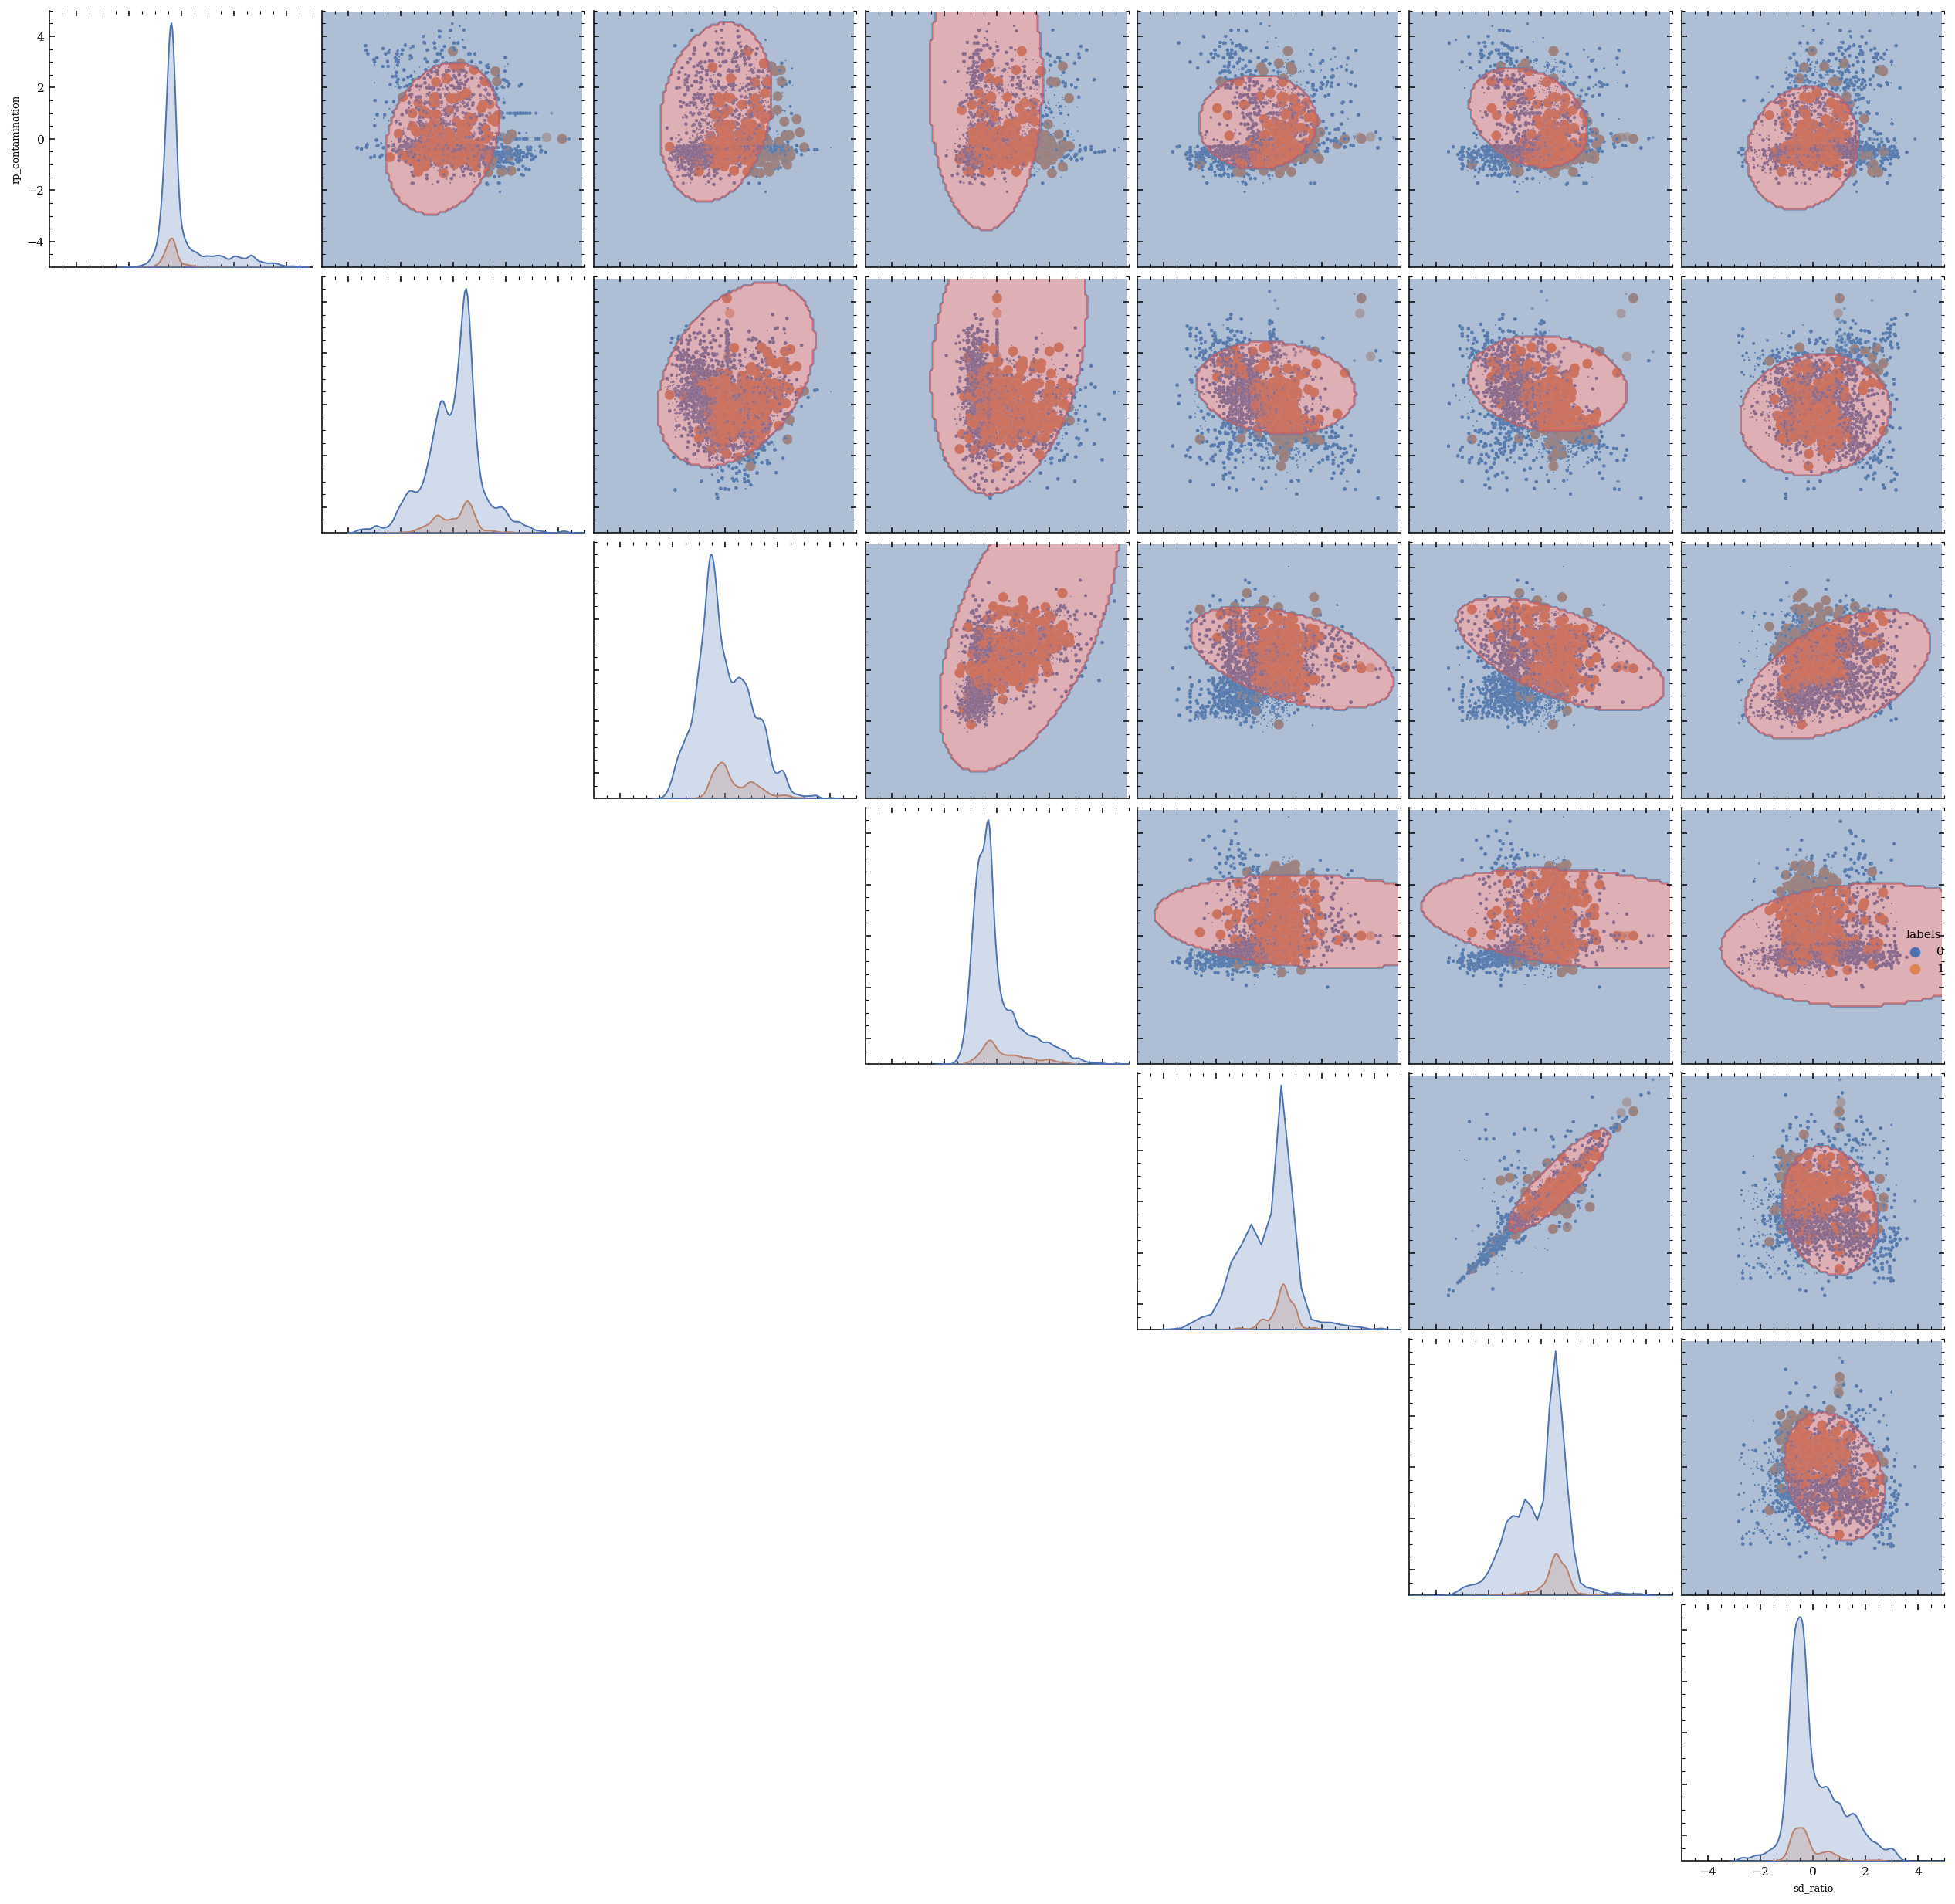

In [31]:
g = sns.pairplot(df, hue = 'labels',plot_kws=dict(alpha=.6, s = 8 * true_weights), palette = sns.color_palette("deep"))
g.set(xlim=(-5,5), ylim = (-5,5))
for i in range(7) : 
    for j in range(7) : 
        if i > j : 
            g.axes[i,j].set_visible(False)
        elif i< j :  
            
            qda = QuadraticDiscriminantAnalysis(priors=[1/11, 10/11])
            qda.fit(np.concatenate(X_cluster)[:,[i,j]], np.concatenate(y_cluster))
            x,y = np.mgrid[-5:5:.1, -5:5:.1]
            Z = qda.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)
            surf = g.axes[i,j].contourf(x,y,Z, cmap = cmap1.resampled(2), alpha = .5)
plt.savefig("qda_pair", dpi = 300)


In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(np.concatenate(X_cluster)[:30000, [0,5]], np.concatenate(y_cluster)[:30000], sample_weight = true_weights[:30000])

GaussianNB()

In [18]:
gnb.score(np.concatenate(X_cluster)[30000:, [0,5]], np.concatenate(y_cluster)[30000:], sample_weight = true_weights[30000:])

0.8248742752693505

In [19]:
x,y = np.mgrid[-5:5:.1, -5:5:.1]
Z = gnb.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)


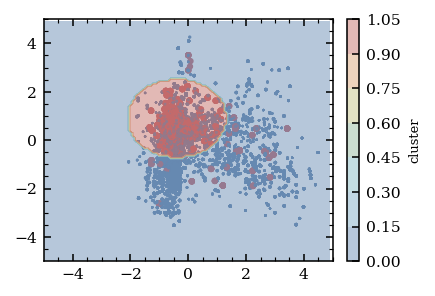

In [21]:
fig,ax = plt.subplots(figsize = (3,2))
scat = ax.scatter(np.concatenate(X_cluster)[:,0], np.concatenate(X_cluster)[:,5],s = true_weights , c = np.concatenate(y_cluster), cmap = cmap1)
surf = ax.contourf(x,y,Z, cmap = cmap1, alpha = .5)

plt.colorbar(surf, ax = ax, label = 'cluster')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
plt.savefig("../CR/figure/cluster_GaussianNB.png", dpi = 300)

In [29]:
import seaborn as sns
df = pd.DataFrame(np.concatenate(X_cluster), columns = ['rp_contamination', 'snr', 'sync_spike_2', 'sync_spike_4','firing_rate', 'score_aur', 'sd_ratio'])


In [30]:
df['labels'] = np.concatenate(y_cluster)

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprec

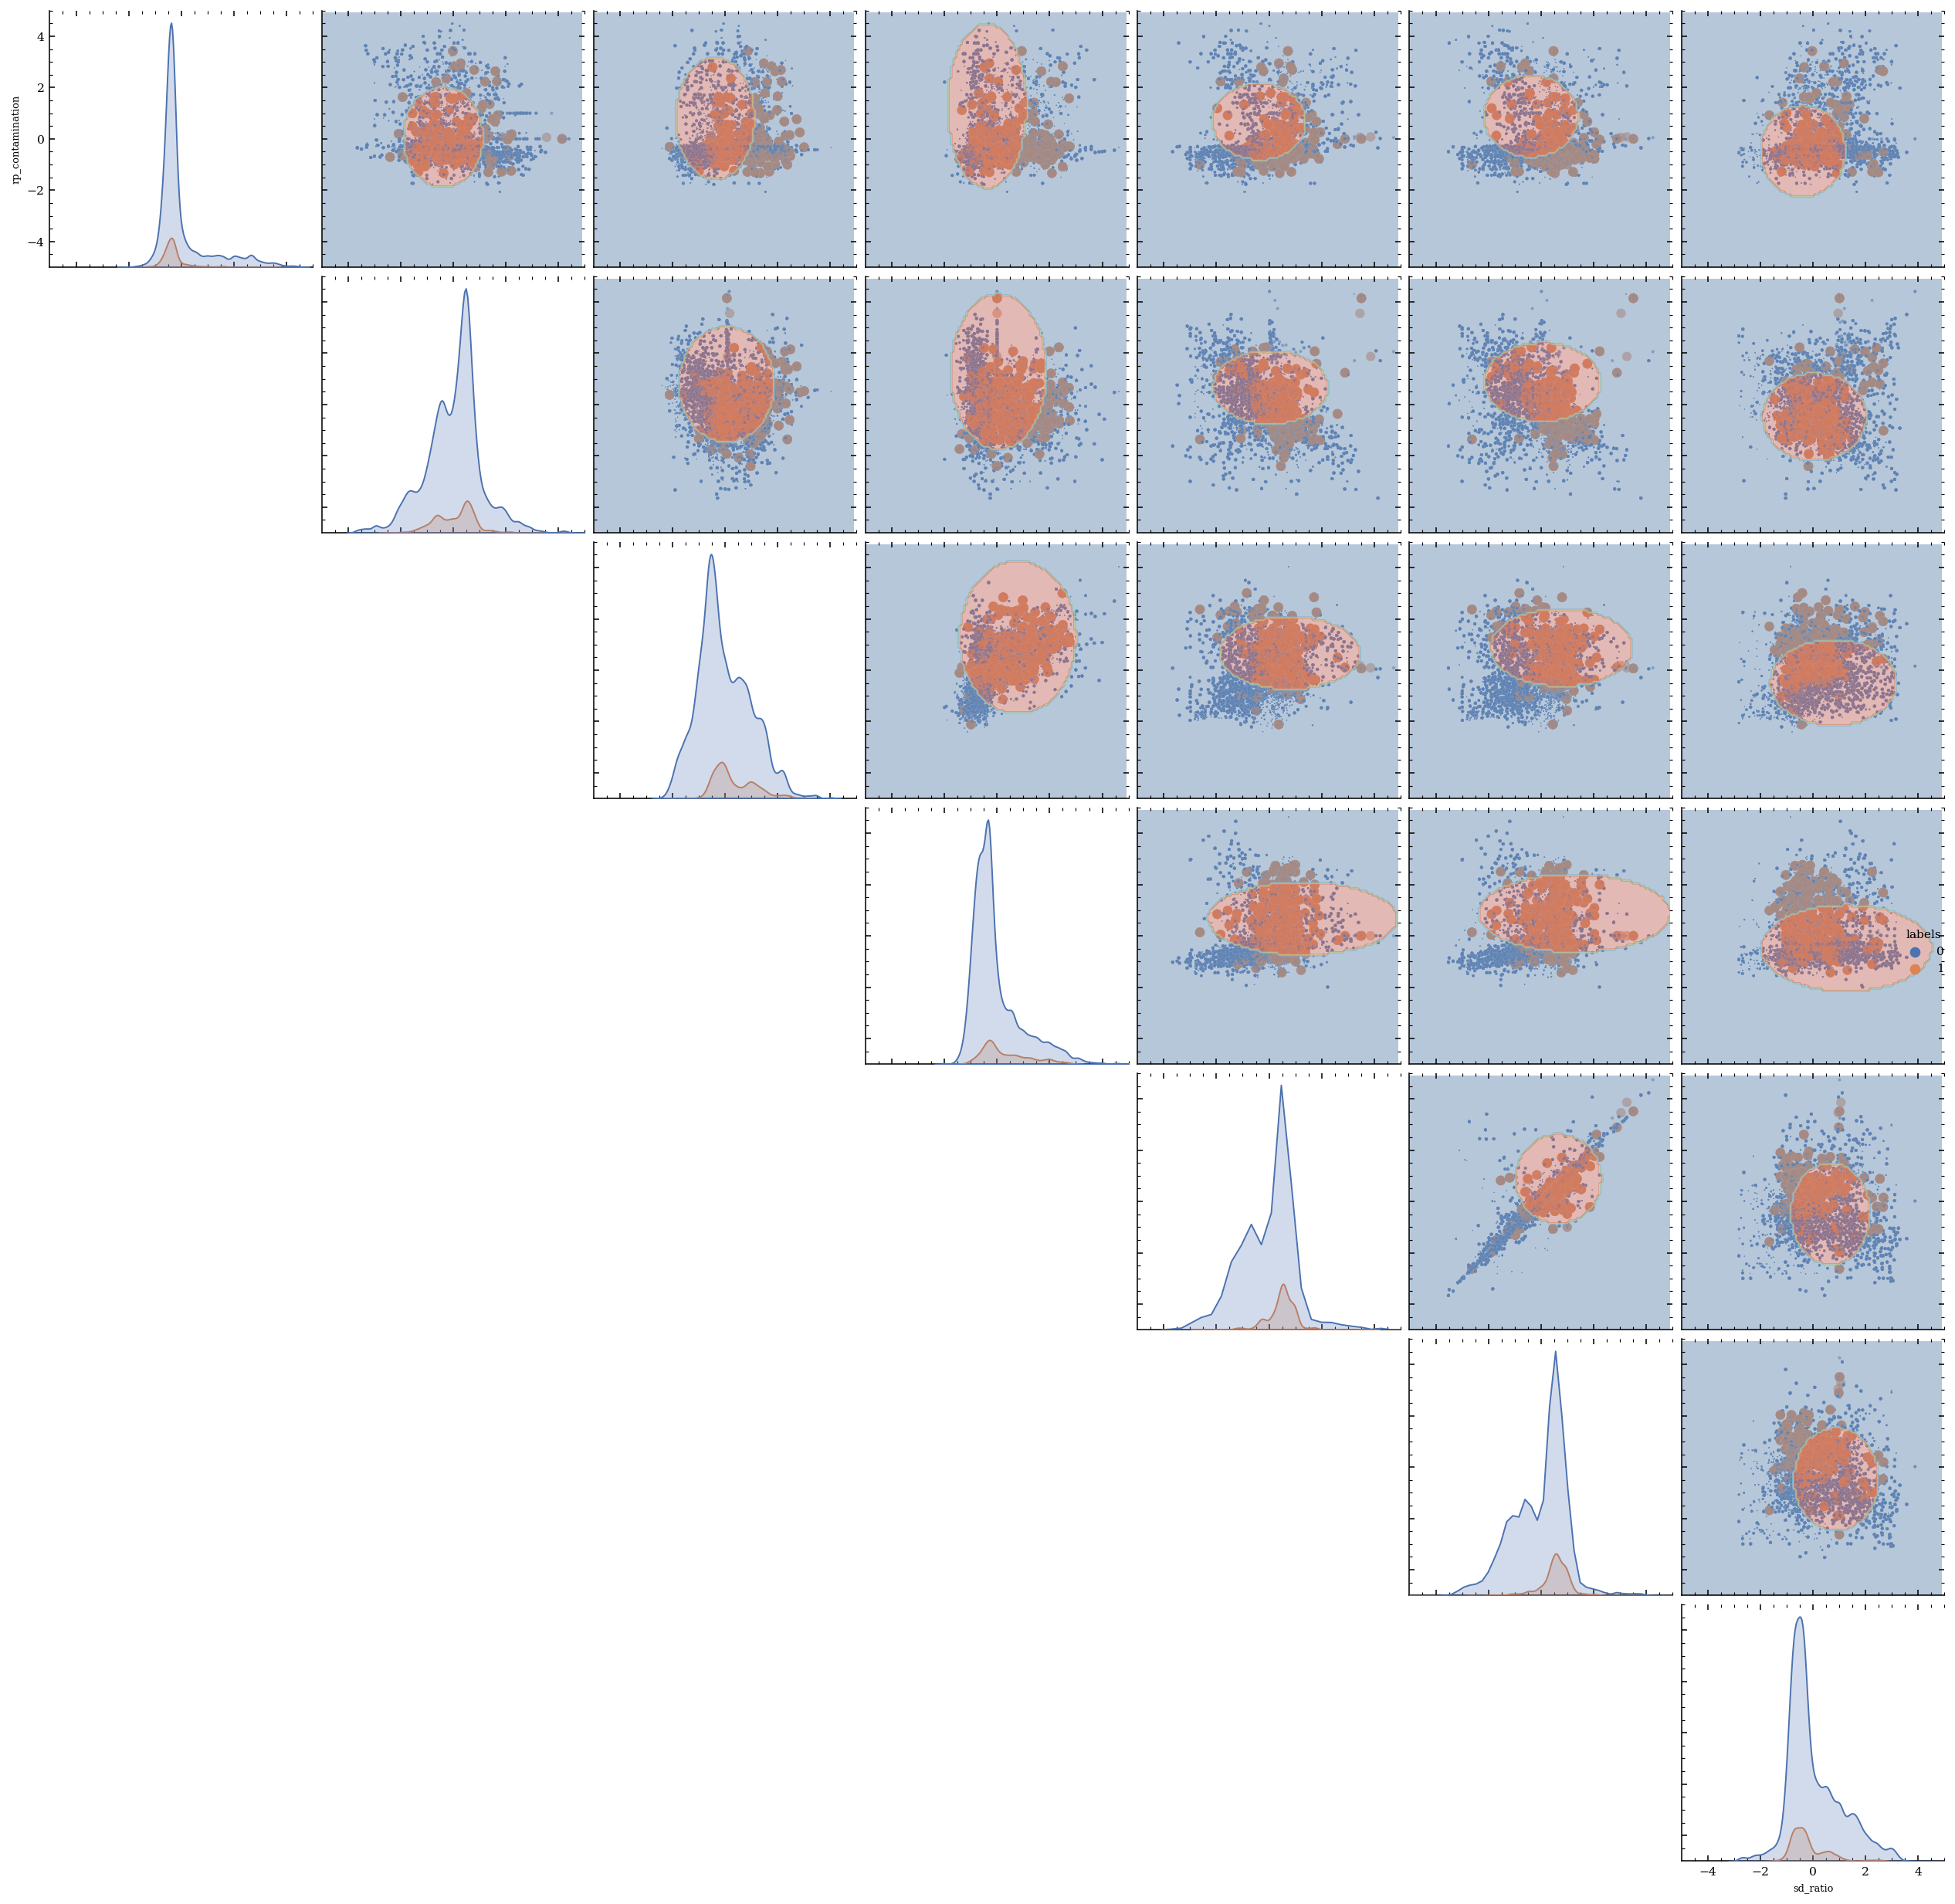

In [33]:
g = sns.pairplot(df,hue='labels', plot_kws=dict(alpha=.6, s = 8 * true_weights), palette = sns.color_palette("deep"))
g.set(xlim=(-5,5), ylim = (-5,5))
for i in range(7) : 
    for j in range(7) : 
        if i > j : 
            g.axes[i,j].set_visible(False)
        elif i< j :  
            
            gnb = GaussianNB()
            gnb.fit(np.concatenate(X_cluster)[:,[i, j]], np.concatenate(y_cluster), sample_weight = true_weights)
            x,y = np.mgrid[-5:5:.1, -5:5:.1]
            Z = gnb.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)
            surf = g.axes[i,j].contourf(x,y,Z, cmap = cmap1, alpha = .5)
plt.savefig("Gaussianb_pair", dpi = 300)


In [24]:
gnb.score(np.concatenate(X_cluster), np.concatenate(y_cluster), sample_weight = true_weights)

0.8484500631052899

In [ ]:
fig,ax = plt.subplots(figsize = (3,2))
scat = ax.scatter(np.concatenate(X_cluster)[:,0], np.concatenate(X_cluster)[:,5],s = true_weights , c = np.concatenate(y_cluster), cmap = cmap1)
surf = ax.contourf(x,y,Z, cmap = cmap1, alpha = .6)
plt.colorbar(surf, ax = ax, label = 'cluster')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)